In [1]:
from dwca.read import DwCAReader

# Define the path to the dataset directory
dataset_path = '/workdir/important_datasets/agribench/PlantNet.zip'

# Read the occurrences and multimedia files using DwCAReader
with DwCAReader(dataset_path) as dwca:
    # Convert the DwCA tables to pandas DataFrames
    print("Core data file is: {}".format(dwca.descriptor.core.file_location)) # => 'occurrence.txt'
    core_df = dwca.pd_read('occurrence.txt', parse_dates=True)
    media_df = dwca.pd_read('multimedia.txt', parse_dates=True)

Core data file is: occurrence.txt


In [75]:
# see where core_df has speciesKey column equals Nan
print(core_df[core_df['speciesKey'].isnull()])

                 id  accessRights  bibliographicCitation  language    license  \
31072    3949498978           NaN                    NaN       NaN  CC_BY_4_0   
89270    3949099661           NaN                    NaN       NaN  CC_BY_4_0   
98487    3949382608           NaN                    NaN       NaN  CC_BY_4_0   
139437   3997828954           NaN                    NaN       NaN  CC_BY_4_0   
168785   3949783376           NaN                    NaN       NaN  CC_BY_4_0   
201676   3949246609           NaN                    NaN       NaN  CC_BY_4_0   
232088   3949669664           NaN                    NaN       NaN  CC_BY_4_0   
232321   3949591230           NaN                    NaN       NaN  CC_BY_4_0   
279707   3949576850           NaN                    NaN       NaN  CC_BY_4_0   
293663   3948981080           NaN                    NaN       NaN  CC_BY_4_0   
300705   3949530827           NaN                    NaN       NaN  CC_BY_4_0   
338939   3949209467         

In [99]:
# delete observations with speciesKey equals Nan
core_df = core_df.dropna(subset=['speciesKey'])
# delete multimedia from observations with speciesKey equals Nan
media_df = media_df[media_df['coreid'].isin(core_df['id'])]

<Axes: xlabel='month', ylabel='scientificName'>

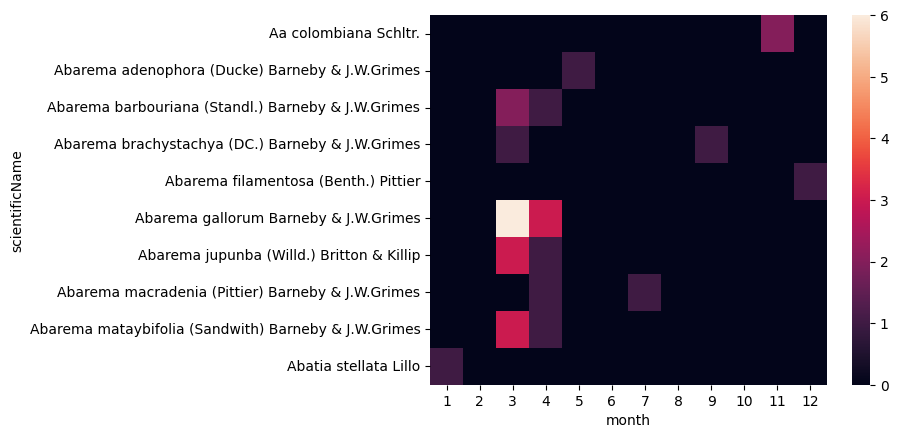

In [100]:
import pandas as pd
import seaborn as sns

# Number of records for each institutioncode
core_df["institutionCode"].value_counts()

# Select the coordinate information of the first twenty records
core_df.loc[:20, ["decimalLatitude", "decimalLongitude"]]

# Count the number of records with date information after 1950
sum(core_df["year"] > 1950)

# Select only those records with coordinates, not (0, 0) coordinates and eventDate provided
core_df[(core_df["decimalLatitude"] != 0.0) &
        (core_df["decimalLatitude"].notnull()) &
        (core_df["decimalLongitude"] != 0.0) &
        (core_df["decimalLongitude"].notnull()) &
        (core_df["eventDate"].notnull())]

# Count the number of records for each species for each month
count_occ = core_df.pivot_table(index="scientificName",
                                columns="month",
                                values="id",
                                aggfunc='count',
                                fill_value=0)
# Visualisation of the counts on a heatmap (Seaborn) of the first 10 species
sns.heatmap(count_occ[:10])

In [101]:
core_df

,id,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,geodeticDatum
0,2644425303,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,GLP,Guadeloupe,GLP.1_1,Basse-Terre,GLP.1.4_1,Bouillante,NaN,NaN,NE,WGS84
1,2643480302,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/afn/observations...,NaN,NaN,...,TUR,Turkey,TUR.26_1,Diyarbakir,TUR.26.13_1,Merkez,NaN,NaN,NE,WGS84
2,2643480304,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,FRA,France,FRA.6_1,Grand Est,FRA.6.4_1,Haut-Rhin,FRA.6.4.2_1,Colmar,NE,WGS84
3,2974267304,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,BEL,Belgium,BEL.2_1,Vlaanderen,BEL.2.1_1,Antwerpen,BEL.2.1.3_1,Turnhout,NE,WGS84
4,3949554306,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,GBR,United Kingdom,GBR.1_1,England,GBR.1.36_1,Greater London,GBR.1.36.25_1,Newham,NE,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714208,3997848436,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,POL,Poland,POL.5_1,Lubuskie,POL.5.4_1,Międzyrzecz,POL.5.4.4_1,Pszczew,NE,WGS84
1714209,3997787463,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.8_1,Isère,FRA.1.8.1_1,Grenoble,NE,WGS84
1714210,3997784502,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/the-plant-list/o...,NaN,NaN,...,FRA,France,FRA.10_1,Nouvelle-Aquitaine,FRA.10.11_1,Pyrénées-Atlantiques,FRA.10.11.2_1,Oloron-Sainte-Marie,NE,WGS84
1714211,3997787472,NaN,NaN,NaN,CC_BY_4_0,NaN,Pl@ntNet,https://identify.plantnet.org/weurope/observat...,NaN,NaN,...,POL,Poland,POL.6_1,Małopolskie,POL.6.6_1,Kraków (City),POL.6.6.1_1,Kraków,NE,WGS84


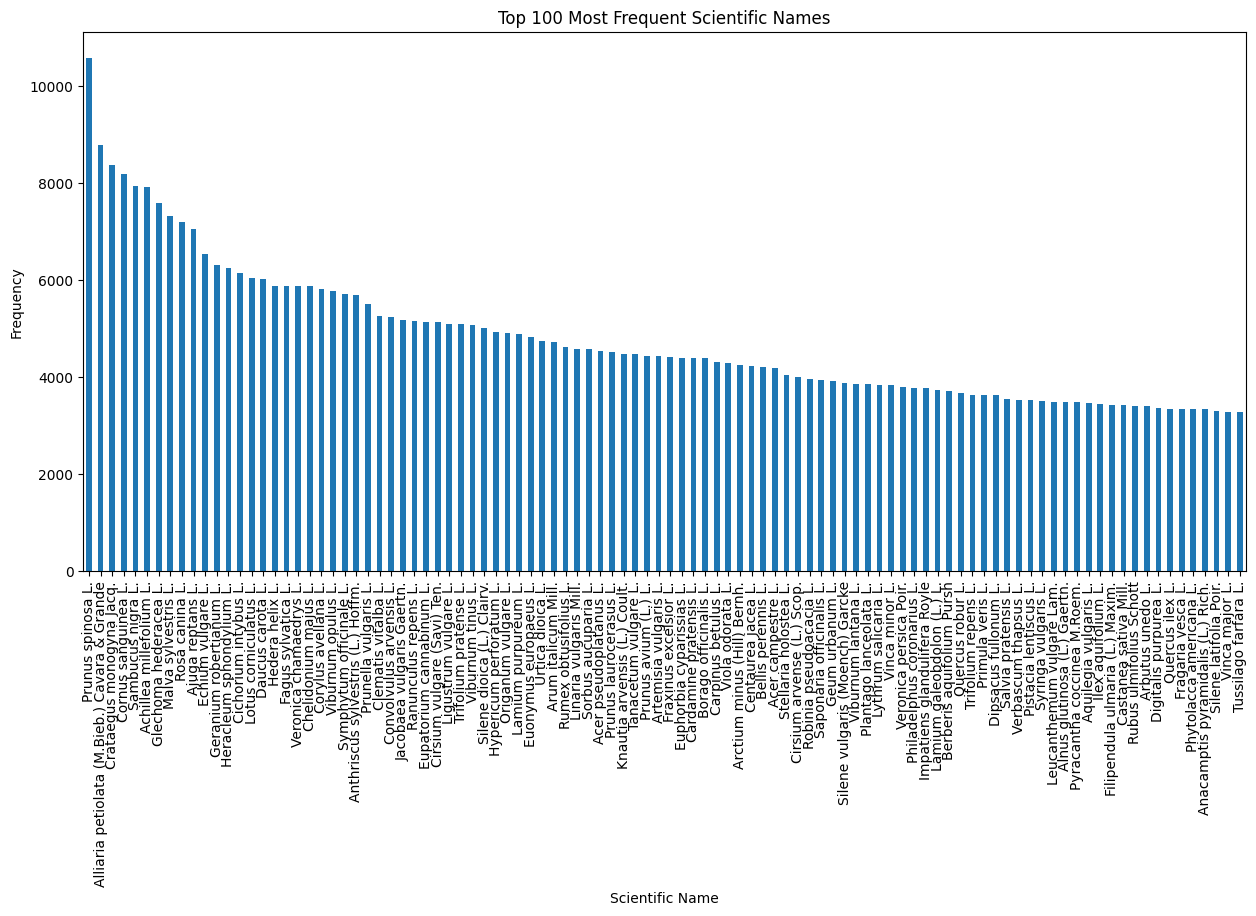

In [102]:
import matplotlib.pyplot as plt
species_counts = core_df['scientificName'].value_counts()
# Plot histogram for top 100 most frequent scientific names
species_counts[:100].plot(kind='bar', figsize=(15, 7))
plt.xlabel('Scientific Name')
plt.ylabel('Frequency')
plt.title('Top 100 Most Frequent Scientific Names')
plt.xticks(rotation=90)
plt.show()

In [103]:
# Drop columns with more than 50% missing values
core_df_ = core_df.dropna(axis=1, how='all').dropna(axis=1, thresh=0.5*len(core_df))

In [104]:
media_df_ = media_df.dropna(axis=1, how='all').dropna(axis=1, thresh=0.5*len(media_df))

In [105]:
media_df_

,coreid,type,format,identifier,title,description,source,created,creator,license,rightsHolder
0,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/5513b0c2f8a86c...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez
1,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/991af6b17dbfd8...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez
2,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/6e632e2d0dfcf1...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez
3,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/e63723a89d1d10...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez
4,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/fc8b06e0cc72b6...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez
...,...,...,...,...,...,...,...,...,...,...,...
2131750,3997875012,StillImage,image/jpeg,https://bs.plantnet.org/image/o/92c169fff7556b...,Jurinea kilaea Azn.: habit,Jurinea kilaea Azn.: habit,https://identify.plantnet.org/the-plant-list/o...,2022-09-17T09:00Z,Rossen Vassilev,Rossen Vassilev (cc-by-sa),Rossen Vassilev
2131751,3997875017,StillImage,image/jpeg,https://bs.plantnet.org/image/o/29e9534ce4ac49...,Emilia discifolia (Oliv.) C.Jeffrey: leaf,Emilia discifolia (Oliv.) C.Jeffrey: leaf,https://identify.plantnet.org/lewa/observation...,2022-12-08T08:23:46Z,Susan Brown,Susan Brown (cc-by-sa),Susan Brown
2131752,3997875021,StillImage,image/jpeg,https://bs.plantnet.org/image/o/0480b8869c43f2...,Lilium martagon L.: leaf,Lilium martagon L.: leaf,https://identify.plantnet.org/weurope/observat...,2007-05-15T10:16:51Z,Sylvain Gaudin,Sylvain Gaudin (cc-by-sa),Sylvain Gaudin
2131753,3997875026,StillImage,image/jpeg,https://bs.plantnet.org/image/o/684ab660e819e1...,Arctostaphylos uva-ursi (L.) Spreng.: leaf,Arctostaphylos uva-ursi (L.) Spreng.: leaf,https://identify.plantnet.org/weurope/observat...,2022-12-09T11:11:31.613Z,perfidus,perfidus (cc-by-sa),perfidus


In [106]:
# Extract organ_type from the 'title' column and create a new column 'organ_type'
media_df_['organ_type'] = media_df_['title'].apply(lambda x: x.split(': ')[1] if ': ' in x else None)

<Axes: xlabel='organ_type'>

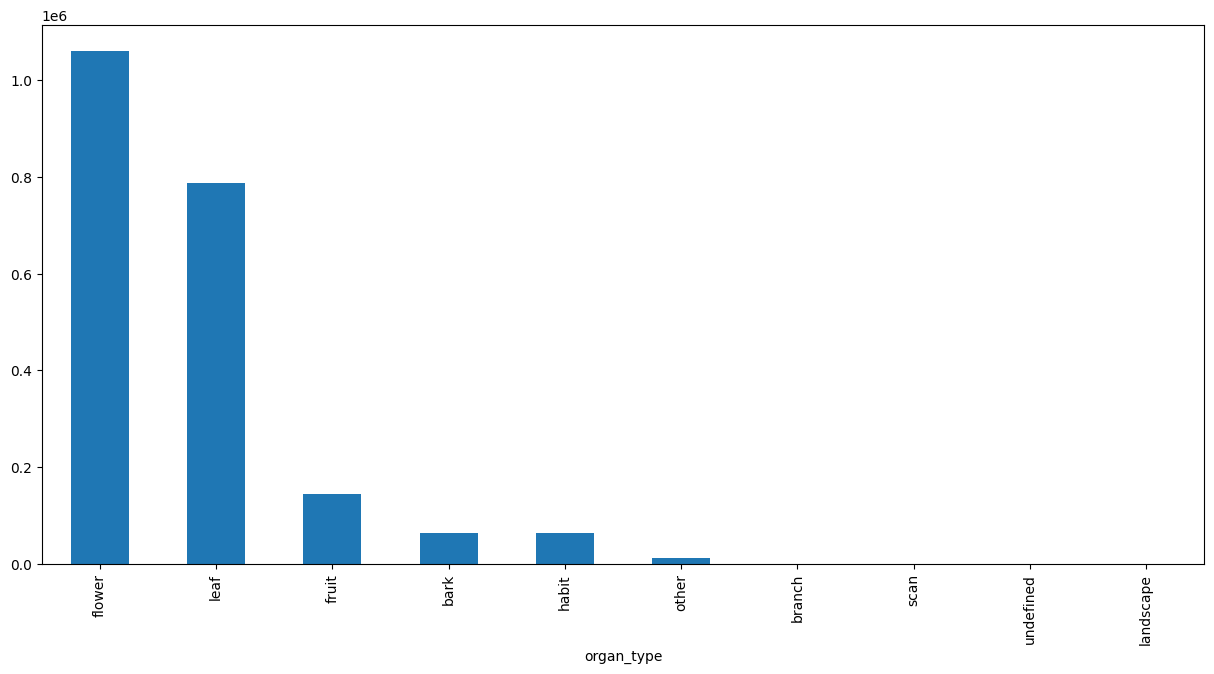

In [107]:
# plot histogram of the organ_type
media_df_['organ_type'].value_counts().plot(kind='bar', figsize=(15, 7))

In [108]:
media_df_['organ_type'].value_counts()

organ_type
flower       1061650
leaf          787114
fruit         143449
bark           64350
habit          63546
other          11424
branch           158
scan               5
undefined          3
landscape          1
Name: count, dtype: int64

In [109]:
# Define the list of organ types to be removed
organ_types_to_remove = ['other', 'branch', 'scan', 'undefined', 'landscape']

# Filter the DataFrame to exclude rows with the specified organ types
media_df_filtered = media_df_[~media_df_['organ_type'].isin(organ_types_to_remove)]

# Display the filtered DataFrame
media_df_filtered

,coreid,type,format,identifier,title,description,source,created,creator,license,rightsHolder,organ_type
0,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/5513b0c2f8a86c...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
1,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/991af6b17dbfd8...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
2,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/6e632e2d0dfcf1...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
3,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/e63723a89d1d10...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
4,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/fc8b06e0cc72b6...,Lecythis idatimon Aubl.: bark,Lecythis idatimon Aubl.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
...,...,...,...,...,...,...,...,...,...,...,...,...
2131750,3997875012,StillImage,image/jpeg,https://bs.plantnet.org/image/o/92c169fff7556b...,Jurinea kilaea Azn.: habit,Jurinea kilaea Azn.: habit,https://identify.plantnet.org/the-plant-list/o...,2022-09-17T09:00Z,Rossen Vassilev,Rossen Vassilev (cc-by-sa),Rossen Vassilev,habit
2131751,3997875017,StillImage,image/jpeg,https://bs.plantnet.org/image/o/29e9534ce4ac49...,Emilia discifolia (Oliv.) C.Jeffrey: leaf,Emilia discifolia (Oliv.) C.Jeffrey: leaf,https://identify.plantnet.org/lewa/observation...,2022-12-08T08:23:46Z,Susan Brown,Susan Brown (cc-by-sa),Susan Brown,leaf
2131752,3997875021,StillImage,image/jpeg,https://bs.plantnet.org/image/o/0480b8869c43f2...,Lilium martagon L.: leaf,Lilium martagon L.: leaf,https://identify.plantnet.org/weurope/observat...,2007-05-15T10:16:51Z,Sylvain Gaudin,Sylvain Gaudin (cc-by-sa),Sylvain Gaudin,leaf
2131753,3997875026,StillImage,image/jpeg,https://bs.plantnet.org/image/o/684ab660e819e1...,Arctostaphylos uva-ursi (L.) Spreng.: leaf,Arctostaphylos uva-ursi (L.) Spreng.: leaf,https://identify.plantnet.org/weurope/observat...,2022-12-09T11:11:31.613Z,perfidus,perfidus (cc-by-sa),perfidus,leaf


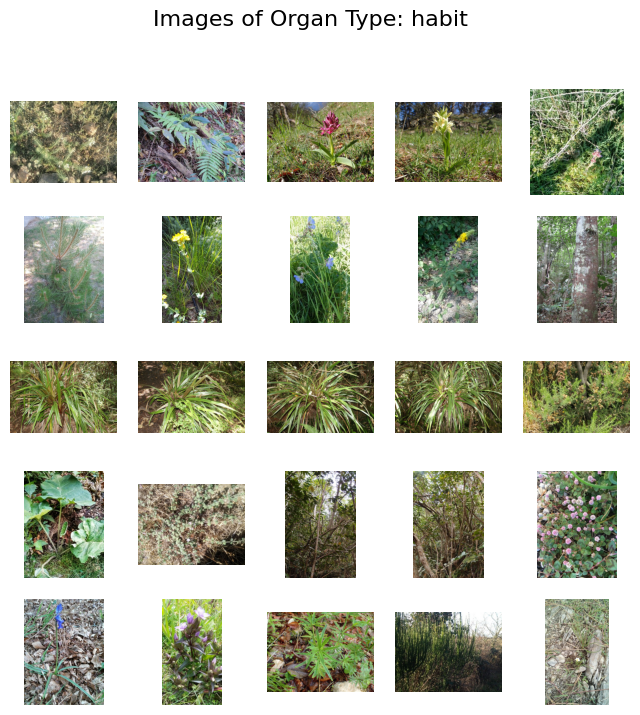

In [110]:
# get subset of media_df_ with organ_type 'other' and display the first few rows
media_df_other = media_df_[media_df_['organ_type'] == 'habit']
# download the images from the urls in identifier column and show them in subfigures using matplotlib

import requests
from PIL import Image
from io import BytesIO

# Create a figure to display the images

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Images of Organ Type: habit', fontsize=16)

# Loop through the first 6 rows of the media_df_other DataFrame
i=0
for _, row in media_df_other.head(25).iterrows():
    # Get the image URL
    image_url = row['identifier']
    # Send a GET request to the image URL
    response = requests.get(image_url)
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))
    # Display the image in a subplot
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].axis('off')
    i+=1


In [111]:
# group by coreid and count the number of multimedia records for each coreid
media_counts = media_df_filtered.groupby('coreid').size()
media_counts

coreid
2643479301    4
2643479302    1
2643479305    1
2643479306    1
2643479308    6
             ..
3997875027    1
3997875028    2
3997875029    1
3997875030    1
3997875031    1
Length: 1711939, dtype: int64

In [112]:
# for same coreid there might be more organs
media_df_filtered.groupby(['coreid', 'organ_type']).size().count() == media_df_filtered.groupby('coreid').size().count()

np.False_

In [90]:
# random sampling of single record for each coreid group if group size is greater than 1
media_df_filtered.coreid = media_df_filtered.coreid.astype(int)
media_sample = media_df_filtered.groupby(['coreid', 'organ_type'])

/tmp/ipykernel_1351893/3627235069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_df_filtered.coreid = media_df_filtered.coreid.astype(int)


In [16]:
# sample 1 image for coreid and organ type
media_sample = media_sample.sample(1)

In [17]:
media_sample

,coreid,type,format,identifier,title,description,source,created,creator,license,rightsHolder,organ_type
853227,2643479301,StillImage,image/jpeg,https://bs.plantnet.org/image/o/c650b91d235310...,Sandwithia guyanensis Lanj.: bark,Sandwithia guyanensis Lanj.: bark,https://identify.plantnet.org/weurope/observat...,2013-03-07T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
1280250,2643479302,StillImage,image/jpeg,https://bs.plantnet.org/image/o/1de8785432c767...,Symphytum tuberosum L.: leaf,Symphytum tuberosum L.: leaf,https://identify.plantnet.org/weurope/observat...,2017-04-09T22:00Z,Jozef Lacko,Jozef Lacko (cc-by-sa),Jozef Lacko,leaf
426697,2643479305,StillImage,image/jpeg,https://bs.plantnet.org/image/o/6d4242ba992d75...,Jacobaea adonidifolia (Loisel.) Pelser & Veldk...,Jacobaea adonidifolia (Loisel.) Pelser & Veldk...,https://identify.plantnet.org/weurope/observat...,2017-07-08T22:00Z,Françoise Peyrissat,Françoise Peyrissat (cc-by-sa),Françoise Peyrissat,flower
853231,2643479306,StillImage,image/jpeg,https://bs.plantnet.org/image/o/dcb2108fee6379...,Ranunculus repens L.: leaf,Ranunculus repens L.: leaf,https://identify.plantnet.org/weurope/observat...,2017-05-11T22:00Z,albet,albet (cc-by-sa),albet,leaf
1705663,2643479308,StillImage,image/jpeg,https://bs.plantnet.org/image/o/58030f2e1daea6...,Couratari multiflora (Sm.) Eyma: bark,Couratari multiflora (Sm.) Eyma: bark,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark
...,...,...,...,...,...,...,...,...,...,...,...,...
426694,3997875027,StillImage,image/jpeg,https://bs.plantnet.org/image/o/1581e1e698dc00...,Smilax glauca Walter: leaf,Smilax glauca Walter: leaf,https://identify.plantnet.org/namerica/observa...,2022-12-09T09:58:44Z,A. M.,A. M. (cc-by-sa),A. M.,leaf
853225,3997875028,StillImage,image/jpeg,https://bs.plantnet.org/image/o/480c2a443bc921...,Chamaecyparis lawsoniana (A.Murray) Parl.: fruit,Chamaecyparis lawsoniana (A.Murray) Parl.: fruit,https://identify.plantnet.org/weurope/observat...,2022-12-09T16:32:42Z,Jean - Louis,Jean - Louis (cc-by-sa),Jean - Louis,fruit
1280249,3997875029,StillImage,image/jpeg,https://bs.plantnet.org/image/o/3d6e32e7741640...,Tanacetum vulgare L.: flower,Tanacetum vulgare L.: flower,https://identify.plantnet.org/weurope/observat...,2022-12-09T15:43:15Z,Michel AMBROISE,Michel AMBROISE (cc-by-sa),Michel AMBROISE,flower
2131754,3997875030,StillImage,image/jpeg,https://bs.plantnet.org/image/o/7386b5359d3583...,Phytolacca americana L.: fruit,Phytolacca americana L.: fruit,https://identify.plantnet.org/weurope/observat...,2022-12-09T17:27Z,Raquel Abajo,Raquel Abajo (cc-by-sa),Raquel Abajo,fruit


<Axes: xlabel='organ_type'>

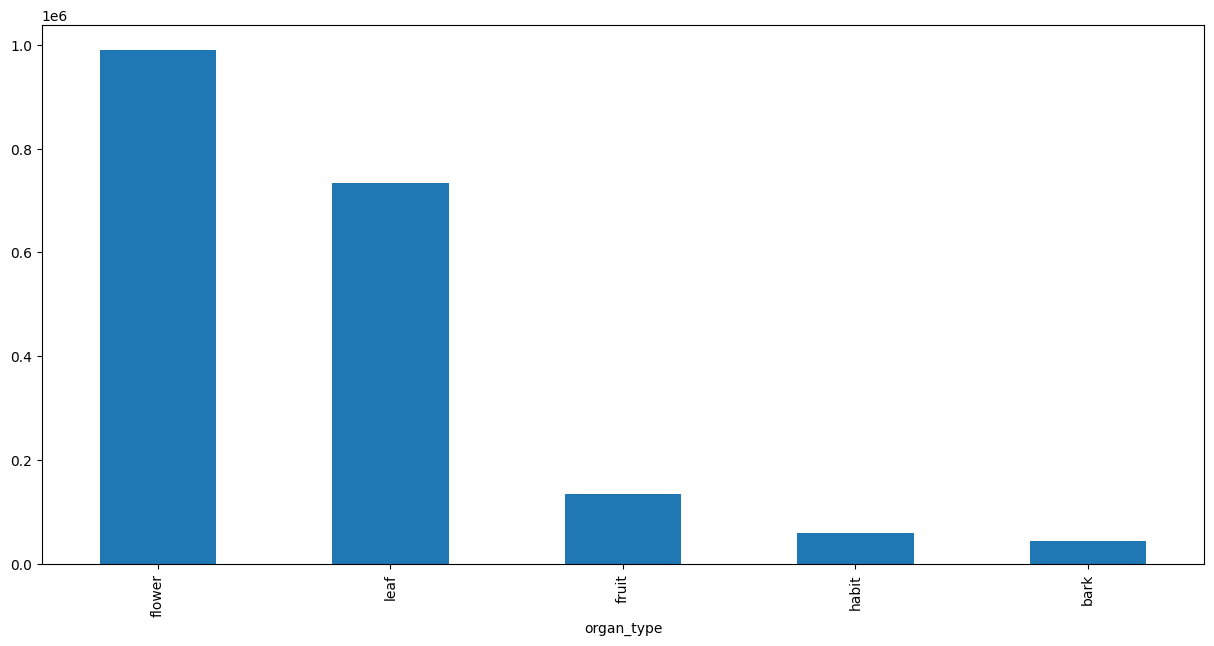

In [18]:
# plot histogram of the organ_type
media_sample['organ_type'].value_counts().plot(kind='bar', figsize=(15, 7))

In [19]:
# Extract organ_type from the 'title' column and create a new column 'organ_type'
media_sample['scientific name'] = media_sample['title'].apply(lambda x: x.split(': ')[0] if ': ' in x else None)
# drop 'title' and 'description' columns
media_sample = media_sample.drop(['title', 'description'], axis=1)
media_sample

,coreid,type,format,identifier,source,created,creator,license,rightsHolder,organ_type,scientific name
853227,2643479301,StillImage,image/jpeg,https://bs.plantnet.org/image/o/c650b91d235310...,https://identify.plantnet.org/weurope/observat...,2013-03-07T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark,Sandwithia guyanensis Lanj.
1280250,2643479302,StillImage,image/jpeg,https://bs.plantnet.org/image/o/1de8785432c767...,https://identify.plantnet.org/weurope/observat...,2017-04-09T22:00Z,Jozef Lacko,Jozef Lacko (cc-by-sa),Jozef Lacko,leaf,Symphytum tuberosum L.
426697,2643479305,StillImage,image/jpeg,https://bs.plantnet.org/image/o/6d4242ba992d75...,https://identify.plantnet.org/weurope/observat...,2017-07-08T22:00Z,Françoise Peyrissat,Françoise Peyrissat (cc-by-sa),Françoise Peyrissat,flower,Jacobaea adonidifolia (Loisel.) Pelser & Veldkamp
853231,2643479306,StillImage,image/jpeg,https://bs.plantnet.org/image/o/dcb2108fee6379...,https://identify.plantnet.org/weurope/observat...,2017-05-11T22:00Z,albet,albet (cc-by-sa),albet,leaf,Ranunculus repens L.
1705663,2643479308,StillImage,image/jpeg,https://bs.plantnet.org/image/o/58030f2e1daea6...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark,Couratari multiflora (Sm.) Eyma
...,...,...,...,...,...,...,...,...,...,...,...
426694,3997875027,StillImage,image/jpeg,https://bs.plantnet.org/image/o/1581e1e698dc00...,https://identify.plantnet.org/namerica/observa...,2022-12-09T09:58:44Z,A. M.,A. M. (cc-by-sa),A. M.,leaf,Smilax glauca Walter
853225,3997875028,StillImage,image/jpeg,https://bs.plantnet.org/image/o/480c2a443bc921...,https://identify.plantnet.org/weurope/observat...,2022-12-09T16:32:42Z,Jean - Louis,Jean - Louis (cc-by-sa),Jean - Louis,fruit,Chamaecyparis lawsoniana (A.Murray) Parl.
1280249,3997875029,StillImage,image/jpeg,https://bs.plantnet.org/image/o/3d6e32e7741640...,https://identify.plantnet.org/weurope/observat...,2022-12-09T15:43:15Z,Michel AMBROISE,Michel AMBROISE (cc-by-sa),Michel AMBROISE,flower,Tanacetum vulgare L.
2131754,3997875030,StillImage,image/jpeg,https://bs.plantnet.org/image/o/7386b5359d3583...,https://identify.plantnet.org/weurope/observat...,2022-12-09T17:27Z,Raquel Abajo,Raquel Abajo (cc-by-sa),Raquel Abajo,fruit,Phytolacca americana L.


In [ ]:
# get species that have all types of organs_type in the dataset
species_with_all_organs = media_sample.groupby('scientific name')['organ_type'].nunique()
species_with_all_organs = species_with_all_organs[species_with_all_organs == 5]
print('Species with all types of organ types:', len(species_with_all_organs.index),'/',media_sample.groupby('scientific name').size().count())
species_with_all_organs

Species with all types of organ types: 4508 / 16450


scientific name
Abelmoschus esculentus (L.) Moench              4
Abies alba Mill.                                5
Abies grandis (Douglas ex D.Don) Lindl.         4
Abies nordmanniana (Steven) Spach               5
Abies pinsapo Boiss.                            5
                                               ..
Ziziphus spina-christi (L.) Desf.               4
Zornia reticulata Sm.                           4
Zuccagnia punctata Cav.                         4
Zygophyllum atriplicoides Fisch. & C.A. Mey.    4
Zygophyllum fabago L.                           5
Name: organ_type, Length: 4508, dtype: int64

In [ ]:

mask = media_sample.groupby('scientific name')['organ_type'].nunique()
species_wo_all_organs = mask[mask < 5]
species_wo_all_organs

scientific name
Aa colombiana Schltr.                                  3
Abarema adenophora (Ducke) Barneby & J.W.Grimes        1
Abarema barbouriana (Standl.) Barneby & J.W. Grimes    1
Abarema brachystachya (DC.) Barneby & J.W.Grimes       2
Abarema filamentosa (Benth.) Pittier                   1
                                                      ..
Zygia racemosa (Ducke) Barneby & J.W.Grimes            1
Zygia sabatieri Barneby & J.W.Grimes                   1
Zygia unifoliolata (Benth.) Pittier                    1
Zygopetalum maculatum (Kunth) Garay                    1
Zygophyllum fontanesii Webb & Berthel.                 2
Name: organ_type, Length: 11942, dtype: int64

In [22]:
# get the media records for the species with all organ types
media_sample_wo_all_organ = media_sample[media_sample['scientific name'].isin(species_wo_all_organs.index)]
media_sample_wo_all_organ

,coreid,type,format,identifier,source,created,creator,license,rightsHolder,organ_type,scientific name
426697,2643479305,StillImage,image/jpeg,https://bs.plantnet.org/image/o/6d4242ba992d75...,https://identify.plantnet.org/weurope/observat...,2017-07-08T22:00Z,Françoise Peyrissat,Françoise Peyrissat (cc-by-sa),Françoise Peyrissat,flower,Jacobaea adonidifolia (Loisel.) Pelser & Veldkamp
1705663,2643479308,StillImage,image/jpeg,https://bs.plantnet.org/image/o/58030f2e1daea6...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark,Couratari multiflora (Sm.) Eyma
0,2643479309,StillImage,image/jpeg,https://bs.plantnet.org/image/o/5513b0c2f8a86c...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark,Lecythis idatimon Aubl.
853238,2643479310,StillImage,image/jpeg,https://bs.plantnet.org/image/o/2a6777139a9bef...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,Jean-François Molino,Jean-François Molino (cc-by-sa),Jean-François Molino,leaf,Licania latistipula Prance
1280258,2643479311,StillImage,image/jpeg,https://bs.plantnet.org/image/o/04e610ec085d51...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,J.-L. Smock,J.-L. Smock (cc-by-sa),J.-L. Smock,bark,Ecclinusa guianensis Eyma
...,...,...,...,...,...,...,...,...,...,...,...
426687,3997875004,StillImage,image/jpeg,https://bs.plantnet.org/image/o/03df5f16eef34c...,https://identify.plantnet.org/the-plant-list/o...,2022-09-14T09:00Z,Rossen Vassilev,Rossen Vassilev (cc-by-sa),Rossen Vassilev,habit,Dianthus nardiformis Janka
426686,3997875004,StillImage,image/jpeg,https://bs.plantnet.org/image/o/480fa3b79dfa7d...,https://identify.plantnet.org/the-plant-list/o...,2022-09-14T09:00Z,Rossen Vassilev,Rossen Vassilev (cc-by-sa),Rossen Vassilev,leaf,Dianthus nardiformis Janka
2131746,3997875008,StillImage,image/jpeg,https://bs.plantnet.org/image/o/bbd7e815e6e5ba...,https://identify.plantnet.org/polynesiefr/obse...,2022-12-06T22:04:57Z,Steve FAAEVA,Steve FAAEVA (cc-by-sa),Steve FAAEVA,leaf,Mussaenda erythrophylla Schumach. & Thonn.
426690,3997875009,StillImage,image/jpeg,https://bs.plantnet.org/image/o/7ba73ee89a1275...,https://identify.plantnet.org/the-plant-list/o...,2022-12-08T04:32:29.471Z,mat tyler,mat tyler (cc-by-sa),mat tyler,flower,Ixia maculata L.


In [23]:
for n in species_wo_all_organs.keys().tolist():
    if n.startswith('Citrus'):
        print(n)

Citrus australasica F.Muell.
Citrus hystrix DC.
Citrus japonica Thunb.
Citrus trifoliata L.
Citrus × limon (L.) Osbeck


In [24]:
# get the media records for the species with all organ types
media_sample_organ = media_sample[media_sample['scientific name'].isin(species_with_all_organs.index)]
media_sample_organ

,coreid,type,format,identifier,source,created,creator,license,rightsHolder,organ_type,scientific name
853227,2643479301,StillImage,image/jpeg,https://bs.plantnet.org/image/o/c650b91d235310...,https://identify.plantnet.org/weurope/observat...,2013-03-07T00:00Z,C. Geniez,C. Geniez (cc-by-sa),C. Geniez,bark,Sandwithia guyanensis Lanj.
1280250,2643479302,StillImage,image/jpeg,https://bs.plantnet.org/image/o/1de8785432c767...,https://identify.plantnet.org/weurope/observat...,2017-04-09T22:00Z,Jozef Lacko,Jozef Lacko (cc-by-sa),Jozef Lacko,leaf,Symphytum tuberosum L.
853231,2643479306,StillImage,image/jpeg,https://bs.plantnet.org/image/o/dcb2108fee6379...,https://identify.plantnet.org/weurope/observat...,2017-05-11T22:00Z,albet,albet (cc-by-sa),albet,leaf,Ranunculus repens L.
853262,2643479324,StillImage,image/jpeg,https://bs.plantnet.org/image/o/904fd74bc13eca...,https://identify.plantnet.org/weurope/observat...,2013-03-13T00:00Z,D. Frame,D. Frame (cc-by-sa),D. Frame,bark,Licania alba (Bernoulli) Cuatrec.
1705709,2643479344,StillImage,image/jpeg,https://bs.plantnet.org/image/o/a59e987118ca09...,https://identify.plantnet.org/weurope/observat...,2013-03-07T00:00Z,R. Tournebize,R. Tournebize (cc-by-sa),R. Tournebize,bark,Licania alba (Bernoulli) Cuatrec.
...,...,...,...,...,...,...,...,...,...,...,...
2131753,3997875026,StillImage,image/jpeg,https://bs.plantnet.org/image/o/684ab660e819e1...,https://identify.plantnet.org/weurope/observat...,2022-12-09T11:11:31.613Z,perfidus,perfidus (cc-by-sa),perfidus,leaf,Arctostaphylos uva-ursi (L.) Spreng.
853225,3997875028,StillImage,image/jpeg,https://bs.plantnet.org/image/o/480c2a443bc921...,https://identify.plantnet.org/weurope/observat...,2022-12-09T16:32:42Z,Jean - Louis,Jean - Louis (cc-by-sa),Jean - Louis,fruit,Chamaecyparis lawsoniana (A.Murray) Parl.
1280249,3997875029,StillImage,image/jpeg,https://bs.plantnet.org/image/o/3d6e32e7741640...,https://identify.plantnet.org/weurope/observat...,2022-12-09T15:43:15Z,Michel AMBROISE,Michel AMBROISE (cc-by-sa),Michel AMBROISE,flower,Tanacetum vulgare L.
2131754,3997875030,StillImage,image/jpeg,https://bs.plantnet.org/image/o/7386b5359d3583...,https://identify.plantnet.org/weurope/observat...,2022-12-09T17:27Z,Raquel Abajo,Raquel Abajo (cc-by-sa),Raquel Abajo,fruit,Phytolacca americana L.


In [25]:
media_sample_organ['scientific name'].value_counts()[-100:]

scientific name
Phylloscirpus boliviensis (Barros) Dhooge & Goetgh.    5
Juniperus foetidissima Willd.                          5
Solanum campylacanthum A. Rich.                        5
Leontice leontopetalum L.                              5
Sapranthus palanga R.E. Fr.                            5
                                                      ..
Pentagonia gomez-lauritoi Hammel                       4
Sapranthus palanga R.E.Fr.                             4
Chrysophyllum colombianum (Aubrév.) T.D.Penn.          4
Lupinus bogotensis Benth.                              4
Jurinea kilaea Azn.                                    4
Name: count, Length: 100, dtype: int64

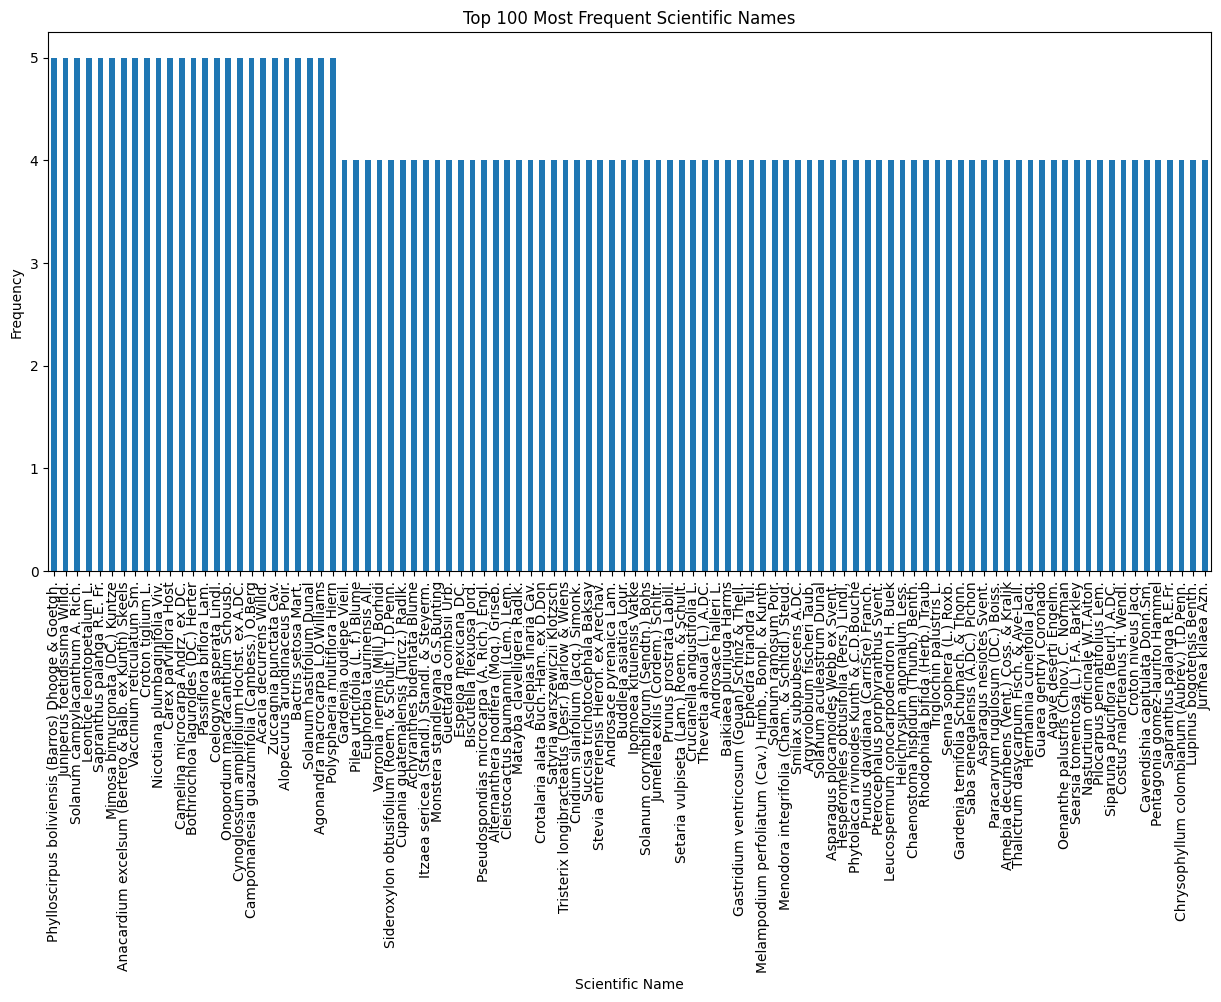

In [26]:
species_counts = media_sample_organ['scientific name'].value_counts()
# Plot histogram for top 100 most frequent scientific names
species_counts[-100:].plot(kind='bar', figsize=(15, 7))
plt.xlabel('Scientific Name')
plt.ylabel('Frequency')
plt.title('Top 100 Most Frequent Scientific Names')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='organ_type'>

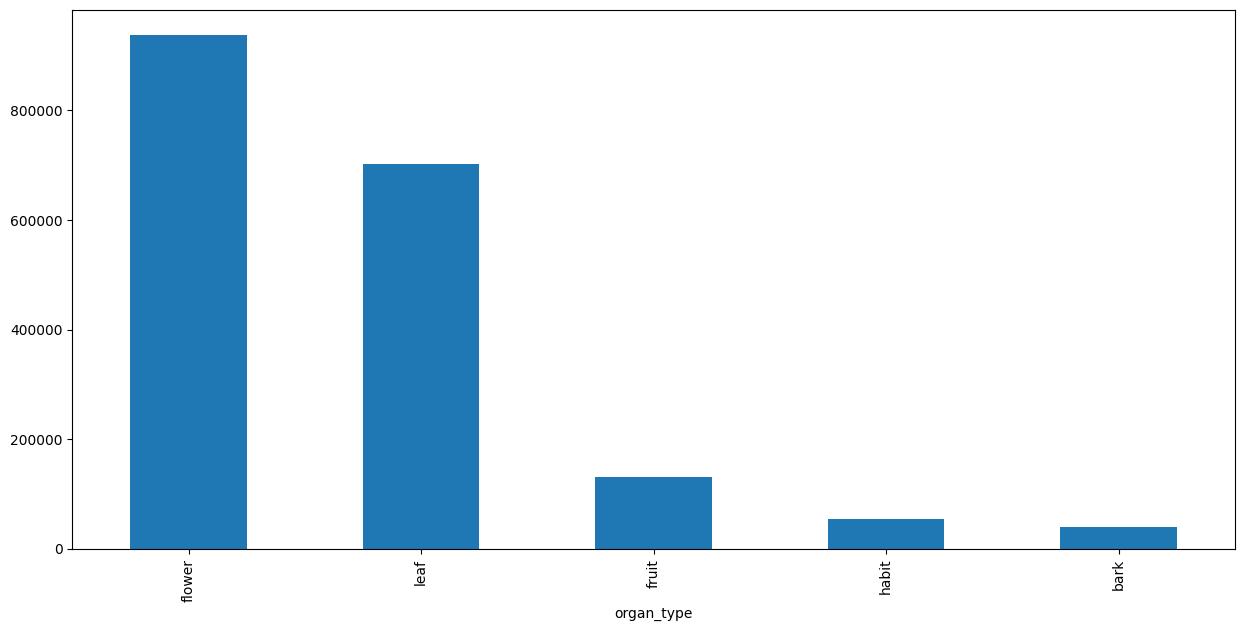

In [27]:
# plot histogram of the organ_type
media_sample_organ['organ_type'].value_counts().plot(kind='bar', figsize=(15, 7))

In [28]:
# for each species with all organ types sample one record for each organ type
media_sample_organ = media_sample_organ.groupby(['scientific name', 'organ_type'])

In [29]:
media_sample_organ.count()

coreid  type  format  \
scientific name                    organ_type                         
Abelmoschus esculentus (L.) Moench flower          16    16      16   
                                   fruit            7     7       7   
                                   habit            1     1       1   
                                   leaf            15    15      15   
Abies alba Mill.                   bark           128   128     128   
...                                               ...   ...     ...   
Zygophyllum fabago L.              bark             1     1       1   
                                   flower          24    24      24   
                                   fruit           23    23      23   
                                   habit            2     2       2   
                                   leaf            55    55      55   

                                               identifier  source  created  \
scientific name                    organ_type                                
Abelmoschus esculentus (L.) Moench flower              16      16       16   
                                   fruit                7       7        7   
                                   habit                1       1        1   
                                   leaf                15      15       15   
Abies alba Mill.                   bark               128     128      128   
...                                                   ...     ...      ...   
Zygophyllum fabago L.              bark                 1       1        1   
                                   flower              24      24       24   
                                   fruit               23      23       23   
                                   habit                2       2        2   
                                   leaf                55      55       55   

                                               creator  license  rightsHolder  
scientific name                    organ_type                                  
Abelmoschus esculentus (L.) Moench flower           16       16            16  
                                   fruit             7        7             7  
                                   habit             1        1             1  
                                   leaf             15       15            15  
Abies alba Mill.                   bark            128      128           128  
...                                                ...      ...           ...  
Zygophyllum fabago L.              bark              1        1             1  
                                   flower           24       24            24  
                                   fruit            23       23            23  
                                   habit             2        2             2  
                                   leaf             55       55            55  

[20356 rows x 9 columns]

In [30]:
# download the images from the urls in identifier column and show them in subfigures using matplotlib


# New dataframe

In [ ]:
'''
create new dataframe containing:
- id
- species name
- species key
- organ type
- identifier
- format
- created
- region
'''

core_df_.keys()

Index(['id', 'license', 'publisher', 'references', 'basisOfRecord',
       'occurrenceID', 'individualCount', 'occurrenceStatus', 'eventDate',
       'startDayOfYear', 'endDayOfYear', 'year', 'month', 'day', 'continent',
       'countryCode', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'acceptedNameUsageID',
       'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
       'genus', 'genericName', 'specificEpithet', 'taxonRank',
       'taxonomicStatus', 'datasetKey', 'publishingCountry', 'lastInterpreted',
       'elevation', 'elevationAccuracy', 'issue', 'mediaType', 'hasCoordinate',
       'hasGeospatialIssues', 'taxonKey', 'acceptedTaxonKey', 'kingdomKey',
       'phylumKey', 'classKey', 'orderKey', 'familyKey', 'genusKey',
       'speciesKey', 'species', 'acceptedScientificName',
       'verbatimScientificName', 'protocol', 'lastParsed', 'lastCrawled',
       'repatriated', 'projectId', 'isSequenced', 'gbifRegion',
       'published

In [113]:
#create a dictionary with key 'id' and value 'acceptedScientificName'
accepted_scientific_name_dict = core_df_.set_index('id')['acceptedScientificName'].to_dict()
species_key_dict = core_df_.set_index('id')['speciesKey'].to_dict()
region_dict = core_df_.set_index('id')['gbifRegion'].to_dict()
date_dict = core_df_.set_index('id')['eventDate'].to_dict()

In [114]:
# create new dataframe containing:
# - id
# - species name
# - species key
# - organ type
# - identifier
# - format
# - created
# - region
gbifID = media_df_.coreid
gbifID.name = 'gbifID'
gbifRegion = media_df_.coreid.apply(lambda x: region_dict[x])
gbifRegion.name = 'gbifRegion'
eventDate = media_df_.coreid.apply(lambda x: date_dict[x])
eventDate.name = 'eventDate'
acceptedScientificName = media_df_.coreid.apply(lambda x: accepted_scientific_name_dict[x])
acceptedScientificName.name = 'acceptedScientificName'
speciesKey = media_df_.coreid.apply(lambda x: species_key_dict[x])
speciesKey.name = 'speciesKey'
speciesKey = speciesKey.astype(int)
organType = media_df_.organ_type
organType.name = 'organType'
mediaFormat = media_df_.format
mediaFormat.name = 'mediaFormat'
mediaIdentifier = media_df_.identifier
mediaIdentifier.name = 'mediaIdentifier'

new_media = pd.DataFrame(
    (
        gbifID,
        acceptedScientificName,
        speciesKey,
        organType,
        mediaIdentifier,
        mediaFormat,
        eventDate,
        gbifRegion

    )
).T

In [116]:
new_media

,gbifID,acceptedScientificName,speciesKey,organType,mediaIdentifier,mediaFormat,eventDate,gbifRegion
0,2643479309,Lecythis idatimon Aubl.,3082461,bark,https://bs.plantnet.org/image/o/5513b0c2f8a86c...,image/jpeg,2013-03-13T00:00Z,LATIN_AMERICA
1,2643479309,Lecythis idatimon Aubl.,3082461,bark,https://bs.plantnet.org/image/o/991af6b17dbfd8...,image/jpeg,2013-03-13T00:00Z,LATIN_AMERICA
2,2643479309,Lecythis idatimon Aubl.,3082461,bark,https://bs.plantnet.org/image/o/6e632e2d0dfcf1...,image/jpeg,2013-03-13T00:00Z,LATIN_AMERICA
3,2643479309,Lecythis idatimon Aubl.,3082461,bark,https://bs.plantnet.org/image/o/e63723a89d1d10...,image/jpeg,2013-03-13T00:00Z,LATIN_AMERICA
4,2643479309,Lecythis idatimon Aubl.,3082461,bark,https://bs.plantnet.org/image/o/fc8b06e0cc72b6...,image/jpeg,2013-03-13T00:00Z,LATIN_AMERICA
...,...,...,...,...,...,...,...,...
2131750,3997875012,Jurinea kilaea Azn.,5392416,habit,https://bs.plantnet.org/image/o/92c169fff7556b...,image/jpeg,2022-09-17T09:00Z,EUROPE
2131751,3997875017,Emilia discifolia (Oliv.) C.Jeffrey,5401491,leaf,https://bs.plantnet.org/image/o/29e9534ce4ac49...,image/jpeg,2022-12-08T08:23:46Z,AFRICA
2131752,3997875021,Lilium martagon L.,2753146,leaf,https://bs.plantnet.org/image/o/0480b8869c43f2...,image/jpeg,2007-05-15T10:16:51Z,EUROPE
2131753,3997875026,Arctostaphylos uva-ursi (L.) Spreng.,2882580,leaf,https://bs.plantnet.org/image/o/684ab660e819e1...,image/jpeg,2022-12-09T11:11:31.613Z,EUROPE


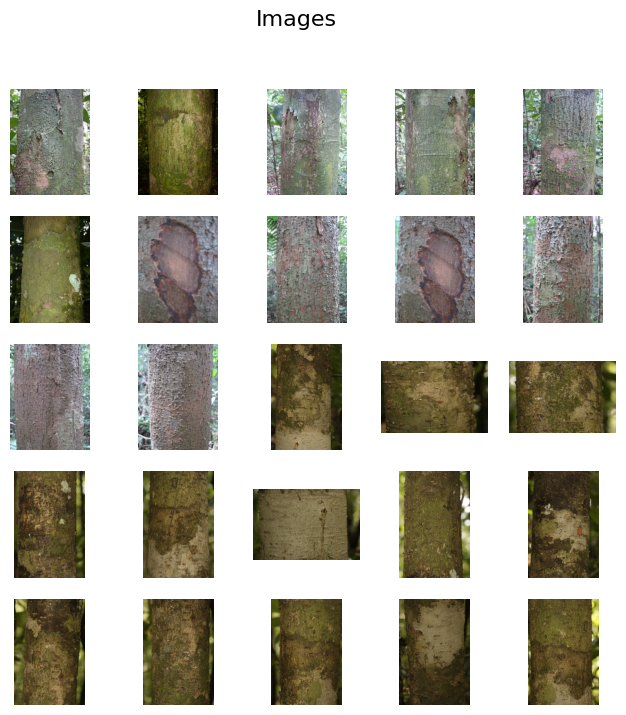

In [117]:
# download and show the images in the new_media dataframe
import requests
from PIL import Image
from io import BytesIO

# Create a figure to display the images
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Images', fontsize=16)

# Loop through the first 6 rows of the media_df_other DataFrame
i=0

for _, row in new_media.head(25).iterrows():
    # Get the image URL
    image_url = row['mediaIdentifier']
    # Send a GET request to the image URL
    response = requests.get(image_url)
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))
    # Display the image in a subplot
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].axis('off')
    i+=1

In [118]:
new_media.groupby(['gbifID', 'speciesKey']).size().count() == new_media.groupby('gbifID').size().count()

np.True_

In [119]:
new_media.groupby(['gbifID', 'organType']).size().count() == new_media.groupby('gbifID').size().count()

np.False_

In [120]:
new_media_sub = new_media.groupby(['gbifID', 'organType'])

In [126]:
new_media_sub[['gbifID', 'organType']].value_counts()

gbifID      organType
2643479301  bark         4
2643479302  leaf         1
2643479305  branch       1
            flower       1
2643479306  leaf         1
                        ..
3997875027  leaf         1
3997875028  fruit        2
3997875029  flower       1
3997875030  fruit        1
3997875031  flower       1
Name: count, Length: 1972136, dtype: int64

In [ ]:
new_media.groupby('gbifID')['organType'].nunique()

gbifID
2643479301    1
2643479302    1
2643479305    2
2643479306    1
2643479308    1
             ..
3997875027    1
3997875028    1
3997875029    1
3997875030    1
3997875031    1
Name: organType, Length: 1714171, dtype: int64